In [145]:
#! /usr/bin/env python
# A sample template for my_bnb_system.py

import numpy as np
import scipy.io
import time
from my_bnb_classify import *
from my_confusion import *

import matplotlib.pyplot as plt

In [2]:
# Load the data set
filename = "/afs/inf.ed.ac.uk/group/teaching/inf2b/cwk2/d/s1621503/data.mat"
# use local data set while not connected to afs
try:
    data = scipy.io.loadmat(filename)
    print("loaded data from afs!")
except Exception:
    data = scipy.io.loadmat("../data.mat")
    print("couldn't data from afs! loading local data...")

couldn't data from afs! loading local data...


In [3]:
# Feature vectors: Convert uint8 to double (but do not divide by 255)
Xtrn = data['dataset']['train'][0, 0]['images'][0, 0].astype(dtype=np.float_)
Xtst = data['dataset']['test'][0, 0]['images'][0, 0].astype(dtype=np.float_)
# Labels : convert float64 to integer, and subtract 1 so that class number starts at 0 rather than 1
Ctrn = data['dataset']['train'][0, 0]['labels'][0, 0].astype(dtype=np.int_) - 1
Ctst = data['dataset']['test'][0, 0]['labels'][0, 0].astype(dtype=np.int_) - 1

In [146]:
# threshold = 1.0
skip = 30
thresh_range = np.arange(256)
thresh_acc = np.zeros((256))

In [173]:
# Run BNB classification
# %time Cpreds = my_bnb_classify(Xtrn, Ctrn, Xtst, threshold)
for t in thresh_range:
    if not thresh_acc[t]:
        Cpreds = my_bnb_classify(Xtrn, Ctrn, Xtst, t)
        _, acc = my_confusion(Ctst, Cpreds)
        thresh_acc[t] = (acc*100)
    else:
        pass

thresh_acc

array([63.02564103, 63.16666667, 63.3974359 , 63.53846154, 63.64102564,
       63.70512821, 63.6025641 , 63.82051282, 63.94871795, 64.        ,
       63.92307692, 63.96153846, 63.93589744, 63.92307692, 63.96153846,
       63.96153846, 63.93589744, 63.96153846, 64.03846154, 64.1025641 ,
       64.32051282, 64.42307692, 64.46153846, 64.53846154, 64.51282051,
       64.51282051, 64.52564103, 64.52564103, 64.51282051, 64.51282051,
       64.5       , 64.42307692, 64.52564103, 64.73076923, 64.6025641 ,
       64.67948718, 64.6025641 , 64.58974359, 64.65384615, 64.5       ,
       64.58974359, 64.55128205, 64.57692308, 64.6025641 , 64.6025641 ,
       64.52564103, 64.74358974, 64.69230769, 64.78205128, 64.76923077,
       64.75641026, 64.52564103, 64.46153846, 64.33333333, 64.34615385,
       64.33333333, 64.30769231, 64.30769231, 64.28205128, 64.38461538,
       64.34615385, 64.35897436, 64.33333333, 64.19230769, 64.23076923,
       64.26923077, 64.32051282, 64.3974359 , 64.37179487, 64.32

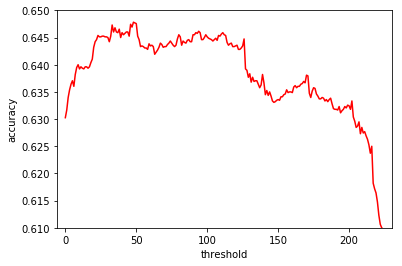

In [174]:
thresh_range_plot = thresh_range[thresh_acc != 0]
thresh_acc_plot = thresh_acc[thresh_acc != 0]

plt.xlim(-6, 230)
plt.ylim(0.61, 0.65)

plt.xlabel('threshold')
plt.ylabel('accuracy')

plt.plot(thresh_range_plot, thresh_acc_plot / 100.0, color='red')

plt.show()

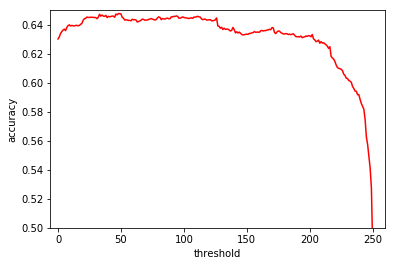

In [143]:
thresh_range_plot = thresh_range[thresh_acc != 0]
thresh_acc_plot = thresh_acc[thresh_acc != 0]

plt.xlim(-6, 260)
plt.ylim(0.50, 0.65)

plt.xlabel('threshold')
plt.ylabel('accuracy')

plt.plot(thresh_range_plot, thresh_acc_plot / 100.0, color='red')

plt.show()

In [176]:
np.save("accuracies", thresh_acc)